In [1]:
import Pkg;
#Pkg.add("DifferentialEquations")
#Pkg.add("Plots")
#Pkg.add("ForwardDiff")
#Pkg.add("LinearAlgebra")
# Packages
using DifferentialEquations
using Plots
using ForwardDiff
using LinearAlgebra
include("utils.jl"); 
include("Fonctions.jl");


# Afficher le champ de vecteurs en focntion de la dynamique et la fonction de commutation

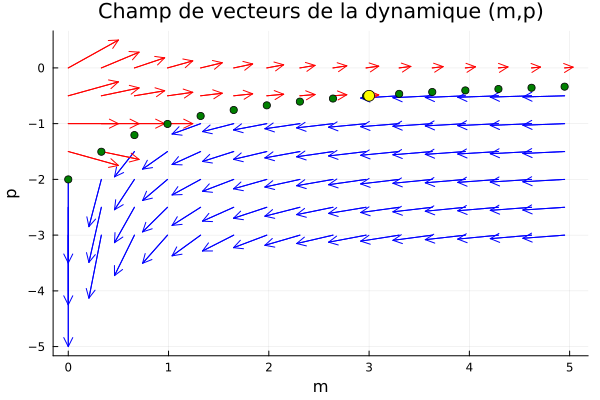

In [2]:


# Constants
a = 1.0
b = 1.0
e = 1.0


# Function decrivant la dynamique du modele
function dynamique(m, p)
    if p > commut(m)
       u = 1.0
    else
        u = -1.0
    end
   
    g = 1 / (e + m)
    f2 = a * m / (e + m)
    f1 = b / (e + m)
    
    dm = (1 + u) / 2 * f1 - (1 - u) / 2 * f2
    dp = (p * (a * e + b) + u * (2 - p * (a * e - b))) / (2 * ((e + m)^2))
    return dm, dp, u
end

# Grid of points for m and p
m_values = (0.0:0.33:5)
p_values = (-3.0:0.5:0.0)

# Initialize arrays for vector components and colors
DM1, DP1 = [], []
DM2, DP2 = [], []
X1, Y1 = [], []
X2, Y2 = [], []

# Calculate the vector field and separate based on the value of u
for m in m_values
    for p in p_values
        dm, dp, u = dynamique(m, p)
        
        if u == 1.0
            push!(DM1, dm)
            push!(DP1, dp)
            push!(X1, m)
            push!(Y1, p)
        else
            push!(DM2, dm)
            push!(DP2, dp)
            push!(X2, m)
            push!(Y2, p)
        end
    end
end
p_values = [commut(m) for m in m_values]
# Plot the vector fields
plot()
quiver!(X2, Y2, quiver=(0.5.*DM2, 0.5.*DP2), color=:blue, label="u = -1")
quiver!(X1, Y1, quiver=(0.5.*DM1, 0.5.*DP1), color=:red, label="u = 1")
scatter!( m_values,p_values , label="", color=:green, markerstrokecolor=:black)
scatter!( [3.0],[-0.5] ,markersize = [6], label="", color=:yellow, markerstrokecolor=:black)

xlabel!("m")
ylabel!("p")
title!("Champ de vecteurs de la dynamique (m,p)")
